In [48]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

# Import Pandas 
import pandas as pd
import datetime as dt 

# Import Matplotlib
import matplotlib.pyplot as plt

In [2]:
# Scrape Data using ALTERNATIVE USING PANDAS 
# Use Pandas 
df2 = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

# Select the first table
mars_df = df2[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
# Scrape HTML using Splinter and Beautiful Soup
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Tempurature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Find the data
table = soup.find('table', class_="table")
rows = table.find('tr', class_="data-row")

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

In [10]:
mars_temps = []

table = soup.find('table', class_="table")
rows = table.find_all('tr', class_="data-row")
    
for row in rows:
    row_data = row.find_all('td')
    
    temperatures = []
    
    for data in row_data:
        temperatures.append(data.text)
    
    mars_temps.append(temperatures)

In [12]:
mars_temps

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [13]:
# Create Pandas dataframe using mars_temps
df = pd.DataFrame(mars_temps, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [14]:
# Examine the data types of all the DataFrame columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [18]:
# Convert to appropriate data types
df.id = df.id.astype('int')
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [19]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [25]:
# Answer the following question: How many months exist on Mars?
total_months = df['month'].max()
total_months

12

In [27]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
dataset_martian_days = df['sol'].count()
dataset_martian_days

1867

In [75]:
# Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
avg_temps = df.groupby(by=["month"])['min_temp'].mean()
print(avg_temps)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


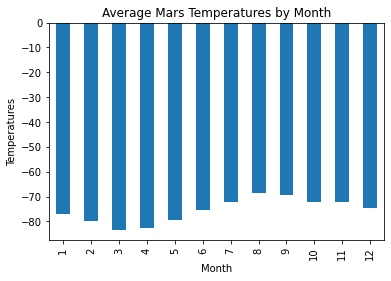

In [77]:
# Plot the average temperature by month
avg_temps.plot(kind='bar')
plt.title("Average Mars Temperatures by Month")
plt.xlabel("Month")
plt.ylabel('Temperatures')
plt.show()

In [85]:
# Min and Max Temps
min_temp = avg_temps.min()
max_temp = avg_temps.max()

print(min_temp, max_temp)

-83.30729166666667 -68.38297872340425


In [86]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
avg_pressure = df.groupby(by=["month"])['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


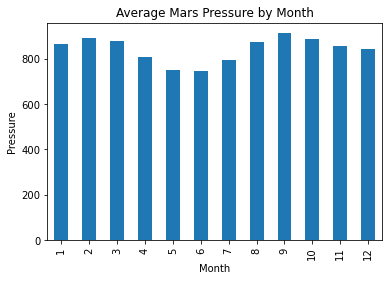

In [87]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.title("Average Mars Pressure by Month")
plt.xlabel("Month")
plt.ylabel('Pressure')
plt.show()

In [88]:
min_pressure = avg_pressure.min()
max_pressure = avg_pressure.max()

print(min_pressure, max_pressure)

745.0544217687075 913.3059701492538


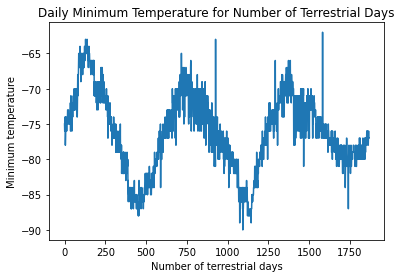

In [96]:
# Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

# Plot daily min temperature 
df.min_temp.plot()
plt.title("Daily Minimum Temperature for Number of Terrestrial Days")
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

# The distance from peak to peak is roughly 1425-750, or 675 days. 
# A year on Mars appears to be about 675 days from the plot. 
# Internet search confirms that a Mars year is equivalent to 687 earth days.

In [97]:
# Export dataframe to csv 
df.to_csv('Resources/mars_temp_data.csv')  